In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
diff_deg = 0.1
num=20

 # Where strike occured
strike_lon = -63.0617
strike_lat =  44.625

# Where sighting occured
sight_lon = -65.05138889
sight_lat = 42.19694444

# Pretty the plot and add histogram
lon_min, lon_max = -67, -61
lat_min, lat_max = 40.5, 45.5


In [4]:
bathy = xr.open_dataset('/home/sdfo600/gpfs7/CONSTANTS/CIOPS-E_v2.0.0/grid/NWA36_Bathymetry_flatbdy_20181109_3_fillchannels_filter_min_7p5.nc')
mesh = xr.open_dataset('/home/sdfo600/gpfs7/CONSTANTS/CIOPS-E_v2.0.0/mesh_mask.nc')
depth = bathy['Bathymetry'].values[1:,1:]
lons = mesh['nav_lon'].values[1:,1:]
lats = mesh['nav_lat'].values[1:,1:]

In [5]:
ciopseU = '/home/nso001/data/work7/OPP/whale-drift/scotian-shelf2024/data/ciopse/*grid_U*.nc'
ciopseV = '/home/nso001/data/work7/OPP/whale-drift/scotian-shelf2024/data/ciopse/*grid_V*.nc'
dU = xr.open_mfdataset(ciopseU).sel(time_counter=slice('2024-04-18', '2024-05-12'))
dV = xr.open_mfdataset(ciopseV).sel(time_counter=slice('2024-04-18', '2024-05-12'))

In [6]:
dUmean = dU.mean(dim='time_counter')
dVmean = dV.mean(dim='time_counter')

In [7]:
uvar='uos'
vvar='vos'
dUmean_unstag = 0.5*(dUmean[uvar].values[:, 1:] + dUmean[uvar].values[:, 0:-1])[1:,:]
dVmean_unstag = 0.5*(dVmean[vvar].values[1:, :] + dVmean[vvar].values[0:-1, :])[:, 1:]

In [8]:
speed = np.sqrt(dUmean_unstag**2 + dVmean_unstag**2)

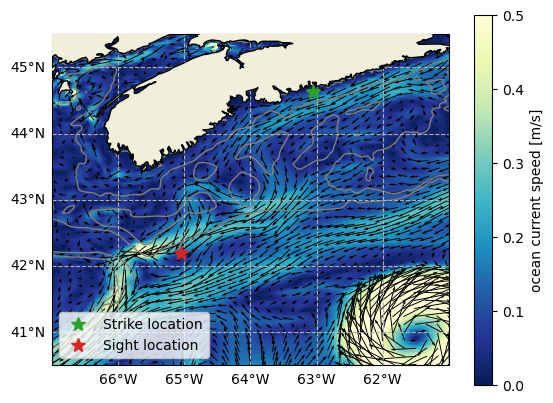

In [13]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()})

mesh  = ax.pcolormesh(lons,lats,speed,transform=ccrs.PlateCarree(), cmap='YlGnBu_r', vmin=0, vmax=0.5)
st=6
q=ax.quiver(lons[::st,::st],lats[::st,::st],dUmean_unstag [::st,::st],dVmean_unstag [::st,::st], color='k',scale=4)
ax.contour(lons,lats, depth, levels=[ 0,100,200], colors='gray', linewidths=1)
cbar=plt.colorbar(mesh,ax=ax)
cbar.set_label('ocean current speed [m/s]')
ax.gridlines(draw_labels=['bottom', 'left'], linestyle='--')
ax.plot(strike_lon, strike_lat, 'C2*', label='Strike location', transform=ccrs.PlateCarree(), ms=10, zorder=12)
ax.plot(sight_lon, sight_lat, 'C3*', label='Sight location', transform=ccrs.PlateCarree(),ms=10, zorder=12)
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
ax.add_feature(cfeature.LAND,zorder=10)
#ax.quiverkey(q, X=0.7, Y=1, U=0.2,
#             label='0.2 m/s', labelpos='E',zorder=20)
ax.coastlines(zorder=11)
ax.legend(loc='lower left')

In [14]:
fig.savefig('overview.png', dpi=300, bbox_inches='tight')